In [ ]:
# DATA PREPROCESSING

In [3]:
# Loading Data and making copy just in case

import pandas as pd

df = pd.read_csv("C:/Users/max dore/Desktop/Data3402 kaggle challenge (churn)/train.csv")
df2 = df.copy()

df2.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
# DROPPING the "Surname" feature. It is not very relevant to predicting churn. (USED)

df2 = df2.drop(columns=['Surname'])

In [6]:
## Numerical vs. Categorical features (and rows and columns)

rows, columns = df2.shape

numerical_features = df2.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df2.select_dtypes(include=['object', 'category']).columns

numerical_features_count = len(numerical_features)
categorical_features_count = len(categorical_features)

print("# Rows:", rows)
print("# Columns:", columns)
print("-------------------------")
print("Numerical Features:", numerical_features_count)
print("Categorical Features:", categorical_features_count)

# Rows: 165034
# Columns: 12
-------------------------
Numerical Features: 10
Categorical Features: 2


In [7]:
#Using IQR to look for outliers

outliers_dict = {}

for column in df2.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df2[(df2[column] < lower_bound) | (df2[column] > upper_bound)]
    outliers_dict[column] = outliers

for column, outlier_data in outliers_dict.items():
    print(f"Outliers in {column} column:")
    print(outlier_data, "\n")


Outliers in id column:
Empty DataFrame
Columns: [id, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: [] 

Outliers in CreditScore column:
            id  CreditScore Geography  Gender   Age  Tenure    Balance  \
35          35          413   Germany    Male  28.0       3  130969.77   
169        169          359    France  Female  44.0       6  128747.69   
705        705          415    France    Male  32.0       5  145807.59   
1161      1161          427     Spain    Male  39.0       8       0.00   
2037      2037          367     Spain  Female  35.0       6   93608.28   
...        ...          ...       ...     ...   ...     ...        ...   
162911  162911          413    France  Female  39.0       5  130969.77   
163765  163765          418     Spain  Female  28.0       7   71269.89   
164420  164420          350    France  Female  40.0       1  111098.85   
164439  164439          427     Spain  Fem

Exited
0    130113
1     34921
Name: count, dtype: int64


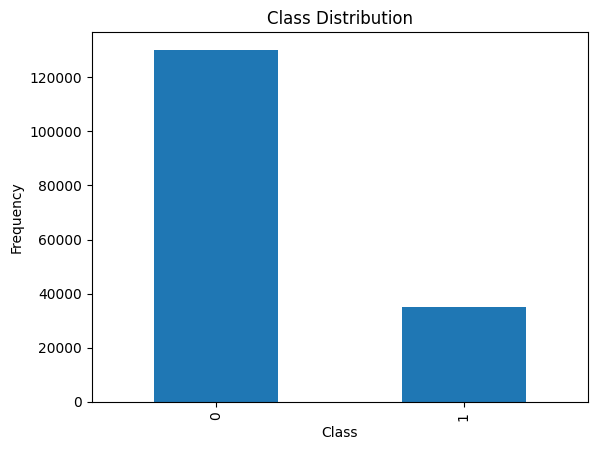

In [8]:
#Detecting Class Imbalance

import matplotlib.pyplot as plt

class_distribution = df2['Exited'].value_counts()

print(class_distribution)

class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

# --------------------------------------------------------------------

In [5]:
# Dropping CustomerID as well from the data frame. seems like an extension of ID and not very useful to the overall model
# (USED)

df2 = df2.drop(columns=['CustomerId'])

In [13]:
# Dropping 'Id' as well from the data frame. Not very useful to the overall model
# (USED)

df2 = df2.drop(columns=['id'])

In [9]:
#Applying one-hot coding to gender

import pandas as pd

df2 = pd.get_dummies(df2, columns=['Gender'], prefix='Gen')

In [10]:
#changing bool dtype to float (not sure why it changed to bool) for Gen

for column in df2.columns:
    if column.startswith('Gen_'):
        df2[column] = df2[column].astype(float)

df2.head()

,id,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gen_Female,Gen_Male
0,0,668,France,33.0,3,0.00,2,1.0,0.0,181449.97,0,0.0,1.0
1,1,627,France,33.0,1,0.00,2,1.0,1.0,49503.50,0,0.0,1.0
2,2,678,France,40.0,10,0.00,2,1.0,0.0,184866.69,0,0.0,1.0
3,3,581,France,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0.0,1.0
4,4,716,Spain,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.0,1.0


In [11]:
#Applying one-hot coding to Geography

import pandas as pd


df2 = pd.get_dummies(df2, columns=['Geography'], prefix='Geo')

for column in df2.columns:
    if column.startswith('Geo_'):
        df2[column] = df2[column].astype(float)

df2.head()
print(df2.dtypes)



id                   int64
CreditScore          int64
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
Gen_Female         float64
Gen_Male           float64
Geo_France         float64
Geo_Germany        float64
Geo_Spain          float64
dtype: object


In [18]:
#Standardizing the numerical columns that aren't encoded

from sklearn.preprocessing import StandardScaler

# 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'
columns_to_standardize = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()

df2[columns_to_standardize] = scaler.fit_transform(df2[columns_to_standardize])

print(df2.head())


   CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0     0.144135 -0.578074 -0.719973 -0.883163       0.814298        1.0   
1    -0.367706 -0.578074 -1.432694 -0.883163       0.814298        1.0   
2     0.268974  0.211354  1.774548 -0.883163       0.814298        1.0   
3    -0.941966 -0.465299 -1.076334  1.486918      -1.013348        1.0   
4     0.743362 -0.578074 -0.007253 -0.883163       0.814298        1.0   

   IsActiveMember  EstimatedSalary  Exited  Gen_Female  Gen_Male  Geo_France  \
0             0.0         1.369486       0         0.0       1.0         1.0   
1             1.0        -1.254085       0         0.0       1.0         1.0   
2             0.0         1.437422       0         0.0       1.0         1.0   
3             1.0        -0.557018       0         0.0       1.0         1.0   
4             1.0        -1.938770       0         0.0       1.0         0.0   

   Geo_Germany  Geo_Spain  
0          0.0        0.0  
1          0.0    

In [19]:
df2.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gen_Female,Gen_Male,Geo_France,Geo_Germany,Geo_Spain
0,0.144135,-0.578074,-0.719973,-0.883163,0.814298,1.0,0.0,1.369486,0,0.0,1.0,1.0,0.0,0.0
1,-0.367706,-0.578074,-1.432694,-0.883163,0.814298,1.0,1.0,-1.254085,0,0.0,1.0,1.0,0.0,0.0
2,0.268974,0.211354,1.774548,-0.883163,0.814298,1.0,0.0,1.437422,0,0.0,1.0,1.0,0.0,0.0
3,-0.941966,-0.465299,-1.076334,1.486918,-1.013348,1.0,1.0,-0.557018,0,0.0,1.0,1.0,0.0,0.0
4,0.743362,-0.578074,-0.007253,-0.883163,0.814298,1.0,1.0,-1.938770,0,0.0,1.0,0.0,0.0,1.0


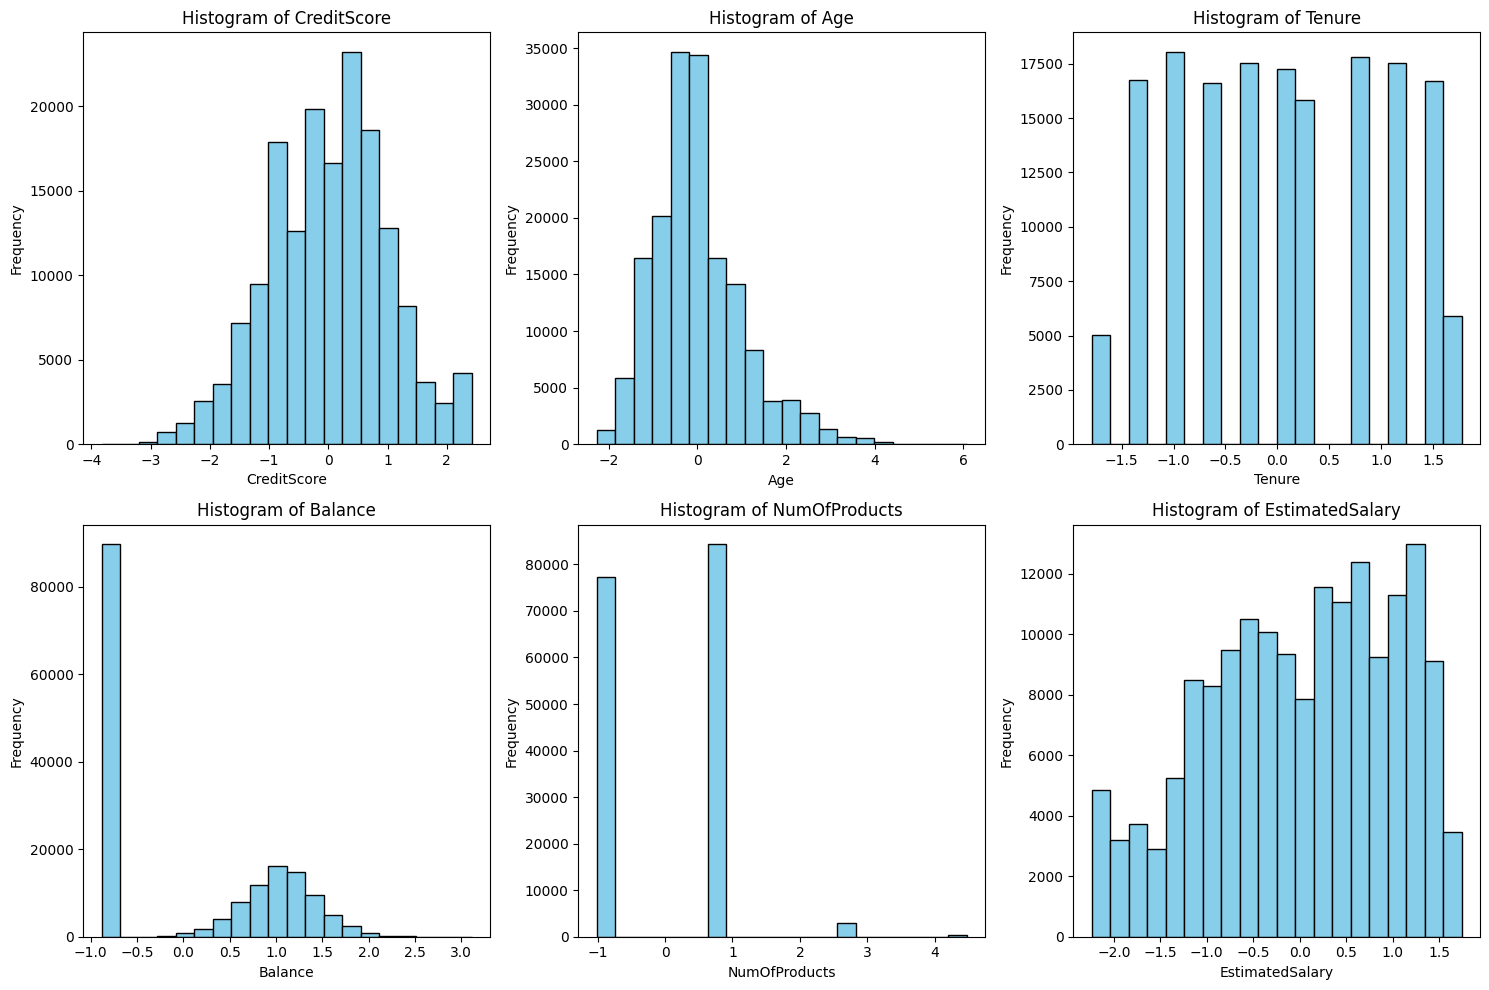

In [21]:
#Histograms of post-standardized data

import matplotlib.pyplot as plt

# 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'
columns_to_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

num_columns = len(columns_to_plot)
cols = 3
rows = (num_columns + cols - 1) // cols

plt.figure(figsize=(15, 5 * rows))

for i, column in enumerate(columns_to_plot):
    plt.subplot(rows, cols, i + 1)
    plt.hist(df2[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


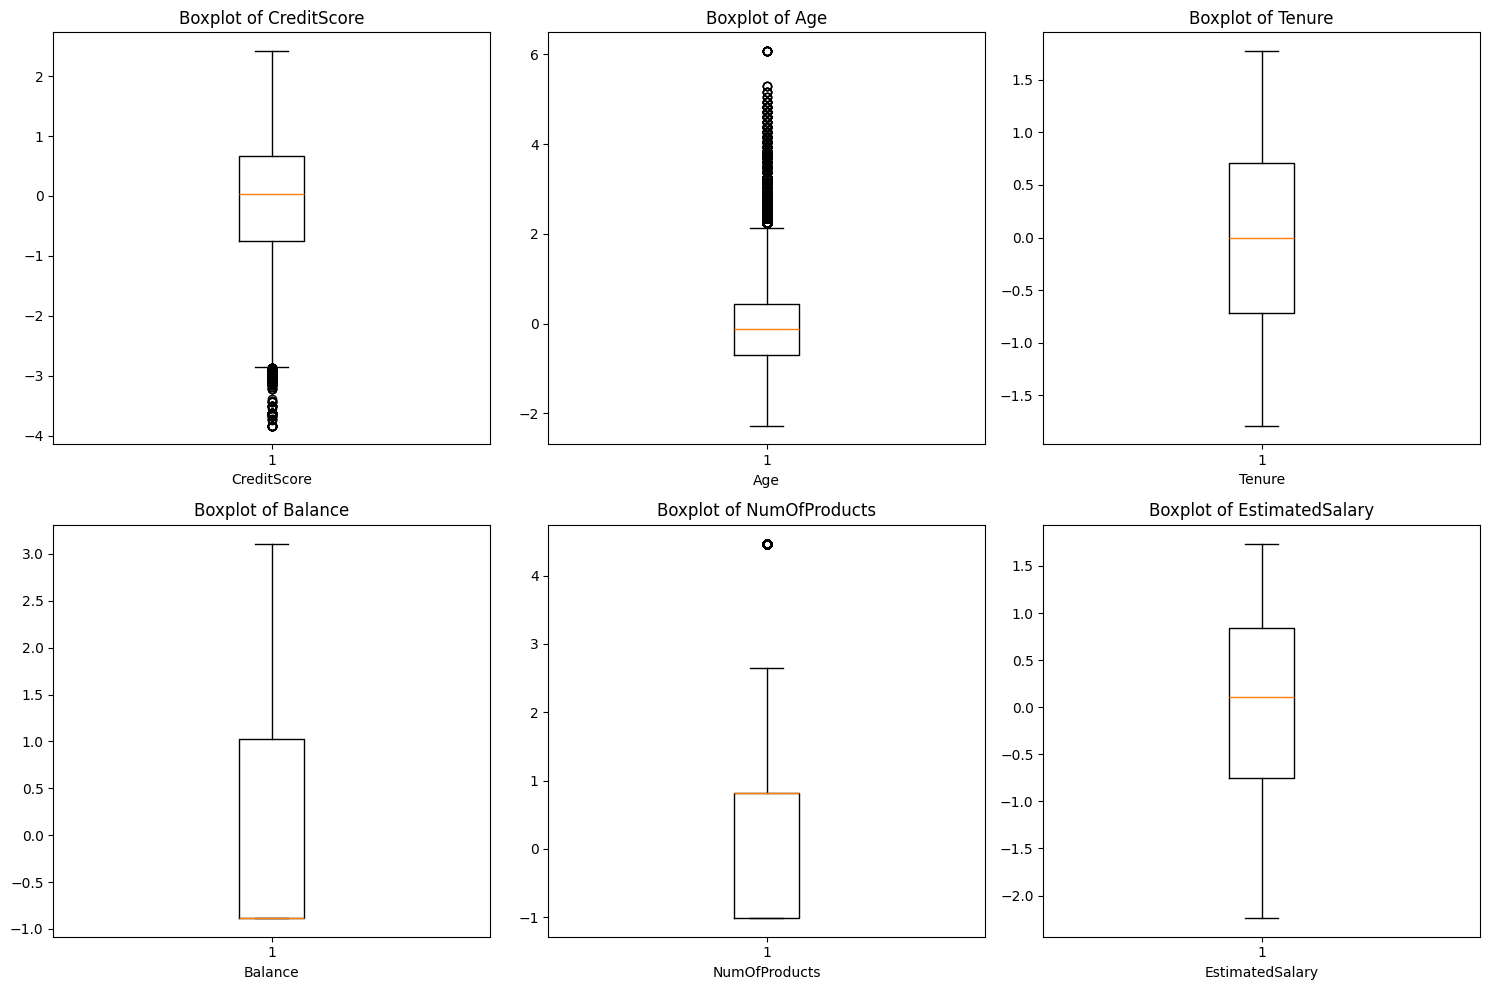

In [23]:
#Boxplots of post-standardized data

import matplotlib.pyplot as plt

# 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'
columns_to_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

num_columns = len(columns_to_plot)
cols = 3
rows = (num_columns + cols - 1) // cols

plt.figure(figsize=(15, 5 * rows))

for i, column in enumerate(columns_to_plot):
    plt.subplot(rows, cols, i + 1)
    plt.boxplot(df2[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


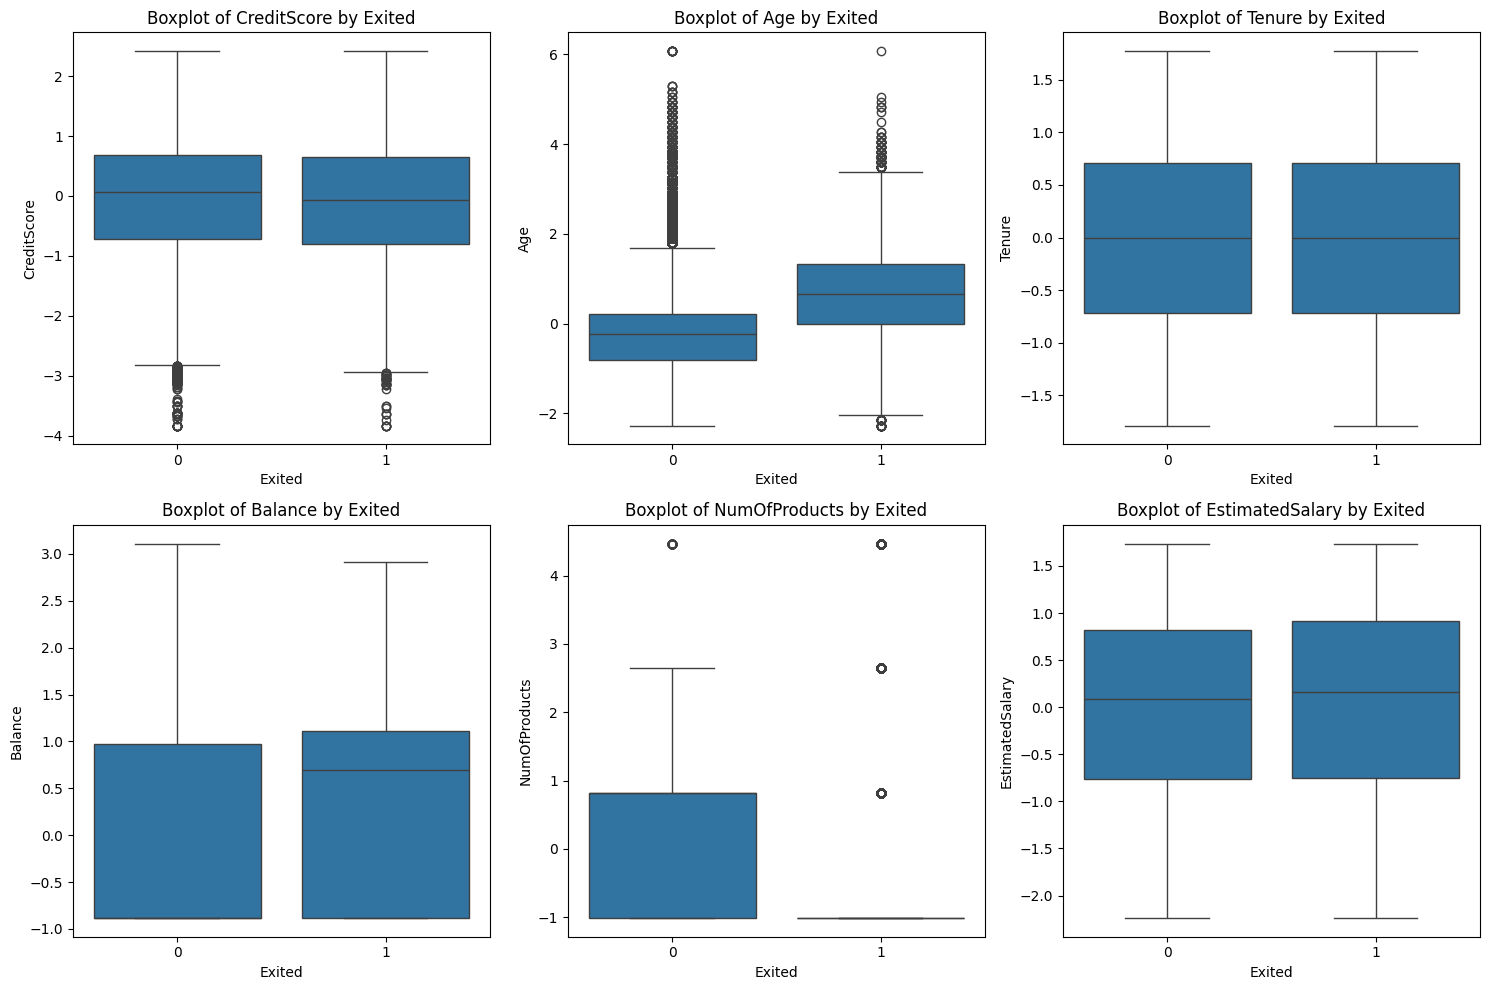

In [25]:
#Boxplots of post-standardized data (divided by target var classes)

import matplotlib.pyplot as plt
import seaborn as sns

# 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'
columns_to_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

num_columns = len(columns_to_plot)
cols = 3  # Number of columns in the subplot grid
rows = (num_columns + cols - 1) // cols  # Calculating the number of rows needed

# Create a figure with subplots
plt.figure(figsize=(15, 5 * rows))  # Adjust the figure size as needed

for i, column in enumerate(columns_to_plot):
    plt.subplot(rows, cols, i + 1)  # Create a subplot for each column
    sns.boxplot(x='Exited', y=column, data=df2)
    plt.title(f'Boxplot of {column} by Exited')
    plt.xlabel('Exited')
    plt.ylabel(column)

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()


In [16]:
#May need to drop a column for the one-hot encoded gender
#No missing values

I removed a couple of unneeded columns. 'CustomerId' seemed inconsequential to the actual predictive modeling process. This was the same case for 'Surname'. 'id' would also be removed. I would go on to encode the two remaining categorical variables 'Geography' and 'Gender'. I suspect they have/can have at least some impact on the target variable. There were no missing values in the dataset nor were there any impossible values. Imputation and other similar methods were not needed for this dataset. However, there were outliers, and as a result standardization was performed on the  numerical categories that were not encoded. Boxplots and Histograms were provided as visualization for data post-standardization.